## Introduction

This notebook is used to cluster the data from the previous notebook. The data is clustered using the KMeans algorithm. The number of clusters is determined using the elbow method. The clusters are then visualized using a scatter plot.

### Prepare Data

In [1]:
import pandas as pd

In [2]:
df_event = pd.read_csv('../data/01-modified-data/last.fm.data/listening_events_sample.csv')
df_users = pd.read_csv('../data/01-modified-data/last.fm.data/users_cleaned.csv')
df_music = pd.read_csv('../data/01-modified-data/last.fm.data/last_fm_track_info.csv')

In [3]:
df_event.head()

,user_id,track_id,album_id,timestamp
0,52710,9299950,16682758,2020-02-14 09:52:25
1,4462,41878638,10034639,2020-01-10 04:40:28
2,43790,38231384,9469808,2020-02-26 22:33:45
3,62831,18075725,20196159,2020-03-04 09:57:50
4,22870,6576931,8946033,2020-03-10 23:50:23


In [4]:
df_compare = df_event.merge(df_music, on='track_id', how='right')

In [5]:
df_compare = df_compare.merge(df_users, on='user_id', how='left')

In [6]:
df_compare.head()

,user_id,track_id,album_id,timestamp,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,id,country,age,gender,creation_time,age_group
0,NaN,21395420,NaN,NaN,0.606,0.3680,0,-9.236,0,0.0793,...,0.000000,0.1370,0.3490,101.549,2WVsyRWVM6xyKkZadKu32E,NaN,NaN,NaN,NaN,NaN
1,NaN,27546101,NaN,NaN,0.695,0.5450,0,-10.836,1,0.0506,...,0.128000,0.1040,0.0387,128.996,7qkmKT915NDWDCOGAE4WCb,NaN,NaN,NaN,NaN,NaN
2,NaN,32308561,NaN,NaN,0.815,0.7230,6,-3.611,0,0.0574,...,0.000000,0.1840,0.8960,149.918,2lAyctg5FocS67eksHoyIg,NaN,NaN,NaN,NaN,NaN
3,NaN,14820954,NaN,NaN,0.791,0.4160,5,-11.939,0,0.2160,...,0.000008,0.0921,0.4760,120.026,3aIYjYtEZuy4fUumde0Gky,NaN,NaN,NaN,NaN,NaN
4,NaN,9337136,NaN,NaN,0.517,0.0154,3,-27.987,1,0.0787,...,0.967000,0.1300,0.1490,112.974,6dzhIRxruUuzbiLF4gqZAz,NaN,NaN,NaN,NaN,NaN


In [7]:
df_compare.isnull().sum()

user_id             2954
track_id               0
album_id            2954
timestamp           2954
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
id                     0
country             2995
age                 2995
gender              2995
creation_time       2995
age_group           5213
dtype: int64

In [8]:
df_compare.columns

Index(['user_id', 'track_id', 'album_id', 'timestamp', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'country',
       'age', 'gender', 'creation_time', 'age_group'],
      dtype='object')

In [9]:
# Drop unnecessary columns
df_compare.drop(['user_id', 'track_id', 'album_id', 'creation_time', 'country', 'timestamp', 'id', 'age_group'], axis=1, inplace=True)

In [10]:
df_compare.isnull().sum()

danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
age                 2995
gender              2995
dtype: int64

In [11]:
df_compare = df_compare.dropna()

In [12]:
df_compare = df_compare[df_compare['age'] != -1]

In [13]:
df_compare.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'age', 'gender'],
      dtype='object')

In [14]:
len(df_compare)

5728

In [15]:
# Turn gender to binary
df_compare['gender'] = df_compare['gender'].apply(lambda x: 1 if x == 'm' else 0)

## Conduct K-Means Clustering

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances

In [20]:
inertia = []
distortions = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(df_compare)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_

    if i > 1:
        silhouette_scores.append(silhouette_score(df_compare, labels, metric='euclidean'))

    cluster_centers = kmeans.cluster_centers_
    distortions.append(sum(np.min(cdist(df_compare, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_compare.shape[0])

### K-Means using Elbow Method to find the optimal number of clusters

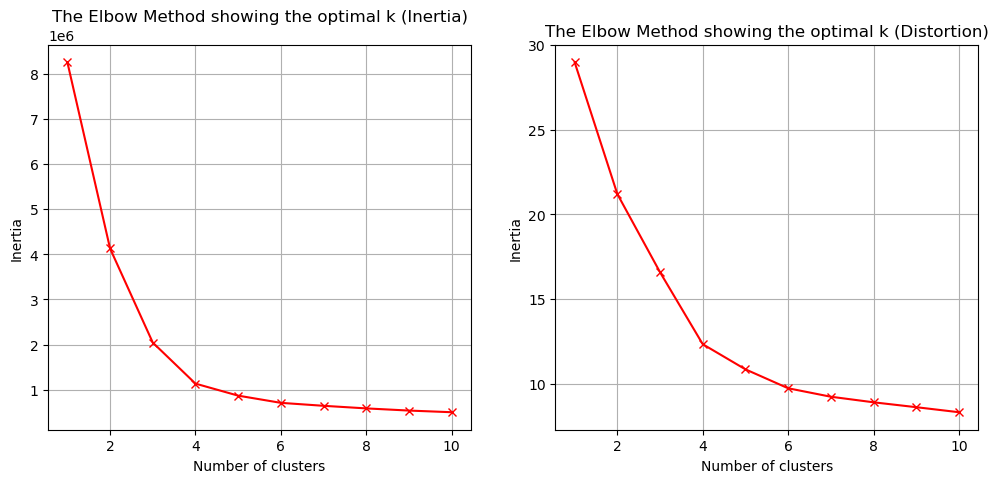

In [21]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))
K = range(1, 11)
ax[0].plot(K, inertia, 'rx-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('The Elbow Method showing the optimal k (Inertia)')
ax[0].grid(True)

ax[1].plot(K, distortions, 'rx-')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Inertia')
ax[1].set_title('The Elbow Method showing the optimal k (Distortion)')
ax[1].grid(True)

### Using Shilouette Score to find the optimal number of clusters

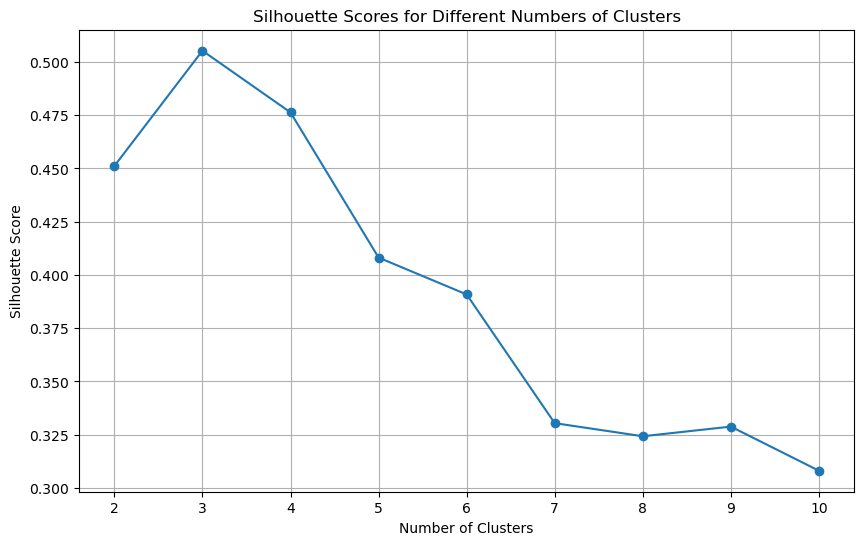

In [22]:
cluster_range = range(2, 11)  # As silhouette scores start from 2 clusters

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### Conduct DBSCAN Clustering

In [25]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.


eps_values = np.arange(0.1, 5.0, 0.1)
min_samples_values = range(2, 20)

sil_score=[]
nclustes_dict = {}

for eps in eps_values:
	for min_sample in min_samples_values:
		clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(df_compare)
		labels=clustering.labels_
		# plot("DBSCAN LABELS WITH eps="+str(eps))
		if len(set(labels)) == 1:
			continue
		# print(clustering.core_sample_indices_)

		#SILHOUETTE METHOD
		cluster_labels = clustering.fit_predict(df_compare)
		silhouette_avg = silhouette_score(df_compare, cluster_labels)
		
		if not len(set(labels)) in nclustes_dict:
			nclustes_dict[len(set(labels))] = silhouette_avg
		else:
			if silhouette_avg > nclustes_dict[len(set(labels))]:
				nclustes_dict[len(set(labels))] = silhouette_avg
		

the optimal number of clusters based on the plot is:  5


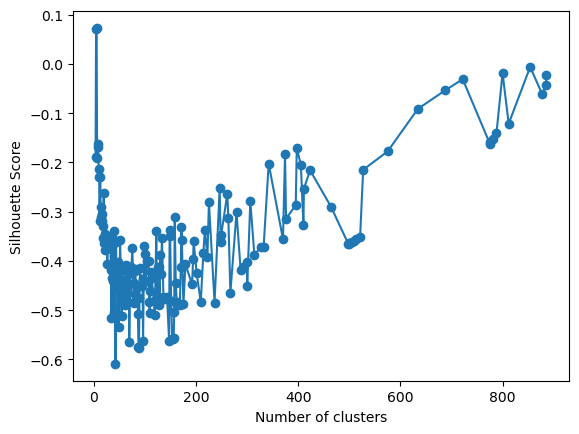

In [26]:
#PLOT RESULTS
ncluster = sorted(nclustes_dict.keys())
sil_score = [nclustes_dict[i] for i in ncluster]
plt.plot(ncluster,sil_score, '-o'); 

max_score_cluster = sorted(ncluster, key=nclustes_dict.get)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of clusters')
print("the optimal number of clusters based on the plot is: ", max_score_cluster[-1])

### Conduct Hierarchical Clustering

In [27]:
model = AgglomerativeClustering(n_clusters=3).fit(df_compare)
labels=model.labels_

In [30]:
np.unique(labels)

array([0, 1, 2])

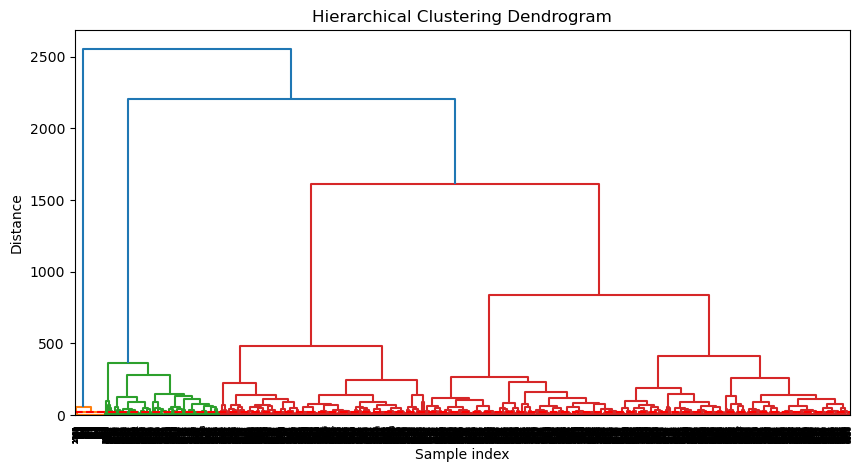

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_compare, method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
)

plt.axhline(y=22, color='r', linestyle='--')

plt.show()

## Result

### Visualize Clusters for K-Means

In [ ]:
# 